<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

 

# MIIIA Advanced Models: Exercise 13 - 12 Jul 2020

 

                         Names                 User                Code
           - Romero Fonseca Angela Fernanda       af.romerof     201819276       
           - Alzate Roman Cindy Zulima            c.alzate       201920019
           - Rojas Arcila Daniel Camilo           d.rojasa       201924286
           - Elquin Huertas Ramírez               e.huertas      201920061

# Exercise 13

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

In [2]:
#import os
#import pandas as pd

#os.listdir('/content/gdrive/My Drive/')
#path = '/content/gdrive/My Drive/'

#data = pd.read_excel('Consolidado_respuestas_escribir_v2.xlsx')
#data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


# Exercise 13.1

Analyze the writing patterns of each student

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import time

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

### Identificar la longitud de cada tarea
A continuación se observan las columnas agregadas en la base, las cuales indican la longitud de cada tarea por estudiante.

In [5]:
data["Longitud_E1"] = data['E1 - Examples of Time Series Analysis'].str.split().str.len()
data["Longitud_E4"] = data['E4 - Panel Data'].str.split().str.len()
data["Longitud_E6"] = data['E6 - Decison Trees'].str.split().str.len()
data["Longitud_E8"] = data['E8 - Ensemble Trees Overview'].str.split().str.len()
data["Longitud_E10"] = data['E10 - REST-API'].str.split().str.len()
data["Longitud_E11"] = data['E11 - Natural Language Processing Overview'].str.split().str.len()
data.head()


,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,301.0,51.0,319.0,309.0,302.0,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,478.0,190.0,341.0,382.0,305.0,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN,333.0,119.0,273.0,372.0,331.0,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0


**Tarea E1:** Se identifica que 44 alumnos respondieron la tarea E1, en promedio se escribieron 309 palabras. El estudiante que escribió más palabras usó 497

**Tarea E4:** 44 alumnos respondieron la tarea E4, el promedio de palabras usadas es de 163 y el máximo de palabras usadas en esta tarea fue de 290. Esta fue la tarea con promedio de palabras más pequeño.

**Tarea E6:** La tarea E6 fue respondida por 42 alumnos, con un promedio de 325 palabras. La tarea más corta fue de 135 palabras. Esta fue la tarea con mayor número de palabras en una respuesta.

**Tarea E8:** Se identifican 38 respuestas a la tarea E8 con 322 palabras en promedio. La tarea con menor longitud incluyó 78 palabras. La tarea con mayor longitud fue de 461 palabras.

**Tarea E10:** La tarea E10 fue respondida por 45 estudiantes, en promedio las respuestas tienen 324 palabras. El alumno que usó 104 fue el de menor longitud, mientras que 543 fue la longitud del que usó más palabras.

**Tarea E11:** Esta tarea es la que tiene menos respuestas, tan sólo 16 alumnos la respondieron con un promedio de 212 palabras. La respuesta que registró menos palabras tenía 3.

### Se quiere identificar el promedio de palabras usadas por estudiante en cada tarea

In [6]:
#Promedio de paralabras por estudiante
data["Media"] = data.mean(axis=1)

In [7]:
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,301.0,51.0,319.0,309.0,302.0,NaN,256.400000
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,478.0,190.0,341.0,382.0,305.0,NaN,339.200000
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN,333.0,119.0,273.0,372.0,331.0,NaN,285.600000
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667


### Tareas Faltantes

In [8]:
data.isnull().sum()

Genero                                         0
E1 - Examples of Time Series Analysis          2
E4 - Panel Data                                2
E6 - Decison Trees                             4
E8 - Ensemble Trees Overview                   8
E10 - REST-API                                 1
E11 - Natural Language Processing Overview    30
Longitud_E1                                    2
Longitud_E4                                    2
Longitud_E6                                    4
Longitud_E8                                    8
Longitud_E10                                   1
Longitud_E11                                  30
Media                                          0
dtype: int64

In [9]:
data["Tareas Faltantes"] =data.isnull().sum(axis=1)/2

In [10]:
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media,Tareas Faltantes
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,301.0,51.0,319.0,309.0,302.0,NaN,256.400000,1.0
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,478.0,190.0,341.0,382.0,305.0,NaN,339.200000,1.0
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000,1.0
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN,333.0,119.0,273.0,372.0,331.0,NaN,285.600000,1.0
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667,0.0


In [11]:
data.groupby(["Genero"])["Tareas Faltantes"].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
F,10.0,0.500000,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.1,1.55,2.0
M,36.0,1.166667,0.810643,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.25,3.0


Los hombres dejaron de hacer en promedio 1.16 tareas, mientras que las mujeres dejaron de hacer en promedio 0.5. El máximo de tareas que dejaron de hacer los hombres es de 3 y el de las mujeres es de 2.

La tarea E10 fue respondida por casi todos los estudiantes, solo faltó uno. La tarea que dejaron de responder más estudiantes fue la E11.

### Dentro de los patrones por estudiantes queremos identificar en que idioma suelen responder las tareas

In [12]:
#Identifica si la respuesta a cada tarea está en idioma inglés 
data['English_E1'] = np.where(data['E1 - Examples of Time Series Analysis'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E1"] != data["Longitud_E1"], "English_E1"] = np.nan 
data['English_E4'] = np.where(data['E4 - Panel Data'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E4"] != data["Longitud_E4"], "English_E4"] = np.nan 
data['English_E6'] = np.where(data['E6 - Decison Trees'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E6"] != data["Longitud_E6"], "English_E6"] = np.nan
data['English_E8'] = np.where(data['E8 - Ensemble Trees Overview'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E8"] != data["Longitud_E8"], "English_E8"] = np.nan
data['English_E10'] = np.where(data['E10 - REST-API'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E10"] != data["Longitud_E10"], "English_E10"] = np.nan
data['English_E11'] = np.where(data['E11 - Natural Language Processing Overview'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E11"] != data["Longitud_E11"], "English_E11"] = np.nan
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media,Tareas Faltantes,English_E1,English_E4,English_E6,English_E8,English_E10,English_E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,301.0,51.0,319.0,309.0,302.0,NaN,256.400000,1.0,1.0,1.0,1.0,1.0,0.0,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,478.0,190.0,341.0,382.0,305.0,NaN,339.200000,1.0,0.0,0.0,0.0,1.0,0.0,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000,1.0,0.0,NaN,1.0,1.0,0.0,1.0
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN,333.0,119.0,273.0,372.0,331.0,NaN,285.600000,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667,0.0,1.0,1.0,1.0,1.0,1.0,1.0


### Se cambian las etiquetas de género para hacer una análisis más claro

In [13]:
list_name=['English_E1','English_E4','English_E6','English_E8','English_E10','English_E11']
data['p_english']=data.loc[:,list_name].sum(axis=1)/(6)
data['usa_english']=np.where((data["p_english"])>0, 1, 0)
data['usa_english'].describe()

count    46.000000
mean      0.434783
std       0.501206
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: usa_english, dtype: float64

In [14]:
# Asigna labels a la variable "GENERO"
Sex = {"F": 'Femenino', "M": 'Masculino'}
data["Genero"] = data["Genero"].apply(lambda x: Sex[x])

In [15]:
data.groupby(['Genero'])['p_english'].describe()
data.groupby(['Genero','usa_english'])['Media'].describe()

count        mean  ...         75%         max
Genero    usa_english                     ...                        
Femenino  0              6.0  245.455556  ...  288.283333  303.333333
          1              4.0  298.300000  ...  347.108333  370.833333
Masculino 0             20.0  279.508333  ...  324.500000  411.500000
          1             16.0  293.977083  ...  307.025000  361.000000

[4 rows x 8 columns]

En la tabla anterior se puede apreciar que hay 46 estudiantes dentro de los cuales 10 son mujeres y 36 son hombres. En promedio, los hombres usan más palabras en sus tareas. Se evidencia más variación en la cantidad de palabras usadas por las mujeres que por los hombres.

In [16]:
#Identifica si la respuesta a cada tarea está en idioma inglés 
data['English_E1'] = np.where(data['E1 - Examples of Time Series Analysis'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E1"] != data["Longitud_E1"], "English_E1"] = np.nan 

data['English_E4'] = np.where(data['E4 - Panel Data'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E4"] != data["Longitud_E4"], "English_E4"] = np.nan 

data['English_E6'] = np.where(data['E6 - Decison Trees'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E6"] != data["Longitud_E6"], "English_E6"] = np.nan

data['English_E8'] = np.where(data['E8 - Ensemble Trees Overview'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E8"] != data["Longitud_E8"], "English_E8"] = np.nan

data['English_E10'] = np.where(data['E10 - REST-API'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E10"] != data["Longitud_E10"], "English_E10"] = np.nan

data['English_E11'] = np.where(data['E11 - Natural Language Processing Overview'].str.contains("the", case=False, na=False), 'T', 'F')
data.loc[data["Longitud_E11"] != data["Longitud_E11"], "English_E11"] = np.nan


data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media,Tareas Faltantes,English_E1,English_E4,English_E6,English_E8,English_E10,English_E11,p_english,usa_english
0,Masculino,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,301.0,51.0,319.0,309.0,302.0,NaN,256.400000,1.0,T,T,T,T,F,NaN,0.666667,1
1,Femenino,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,478.0,190.0,341.0,382.0,305.0,NaN,339.200000,1.0,F,F,F,T,F,NaN,0.166667,1
2,Masculino,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000,1.0,F,NaN,T,T,F,T,0.500000,1
3,Masculino,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN,333.0,119.0,273.0,372.0,331.0,NaN,285.600000,1.0,T,T,T,T,T,NaN,0.833333,1
4,Masculino,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667,0.0,T,T,T,T,T,T,1.000000,1


### Gráfica

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### En las siguientes gráficas se identifica por cada ID de estudiante y género, las palabras que usó para responder cada tarea.

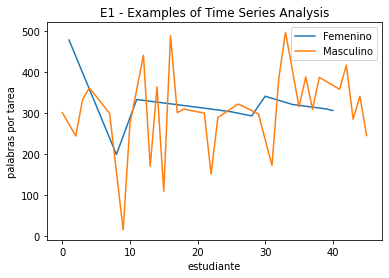

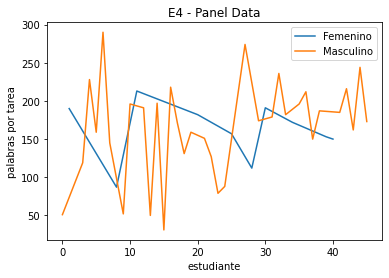

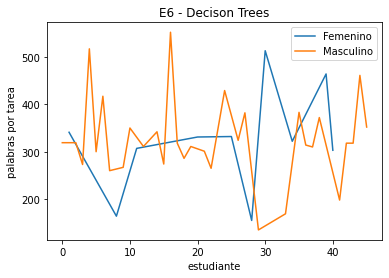

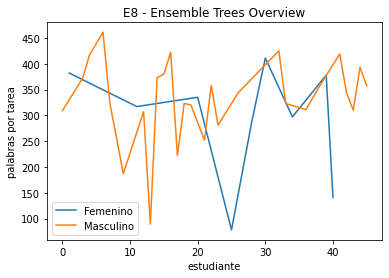

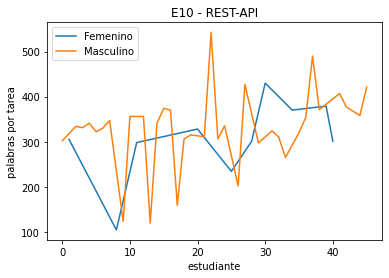

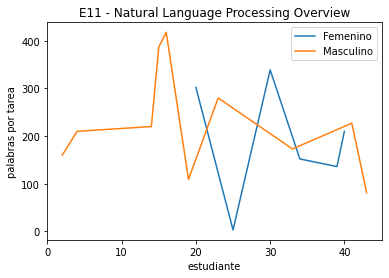

In [18]:
titulos = ['E1 - Examples of Time Series Analysis', 'E4 - Panel Data', 'E6 - Decison Trees', 'E8 - Ensemble Trees Overview','E10 - REST-API','E11 - Natural Language Processing Overview' ]

for i in range(7,13):

    summary=data.iloc[:,[0,i]].dropna()
    summary

    SerieM = summary.loc[summary.Genero=="Masculino"]
    SerieF = summary.loc[summary.Genero=="Femenino"]

    SerieF = SerieF.iloc[:,[1]]
    SerieM = SerieM.iloc[:,[1]]

    plt.plot(SerieF,label="Femenino")
    plt.plot(SerieM,label="Masculino")
    plt.title(titulos[i-7])
    plt.legend()
    plt.xlabel('estudiante')
    plt.ylabel('palabras por tarea')
    plt.show()



### Cantidad de estudiantes por género

En esta gráfica se puede ver la cantidad de estudiantes distribuidos por género, donde se aprecia que los hombres represtentan mayor proporción que las mujeres

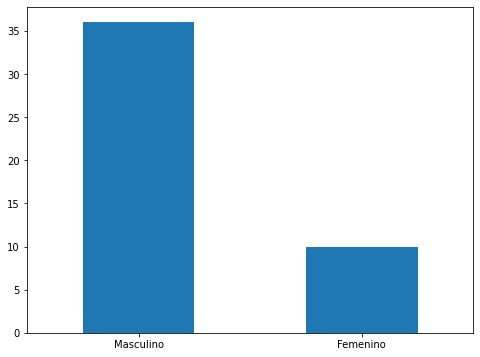

In [19]:
pd.Series(data["Genero"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

### Gráfica de promedio de palabras por género
En esta se encuentra que las mujeres usan en promedio menos palabras para responder las tareas que los hombres.

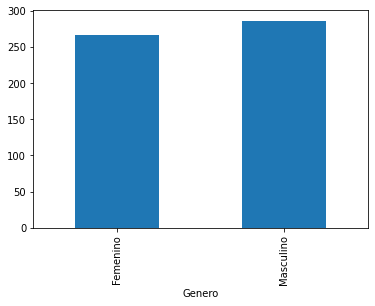

In [20]:
data.groupby(['Genero']).mean()['Media'].plot(kind = 'bar')

In [21]:
import matplotlib.pyplot as plt

### Gráfica por género e idioma en que fueron respondidas las tareas
Se identifica que las mujeres suelen usar más palabrasen inglés en las respuestas de tareas más que los hombres. A excepción de la E8 donde todas las mujeres respondieron en español.

<Figure size 432x288 with 0 Axes>

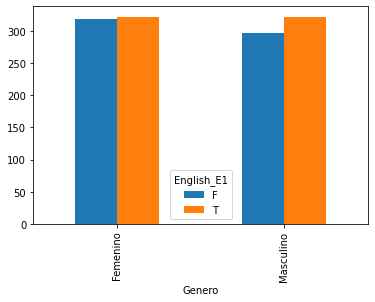

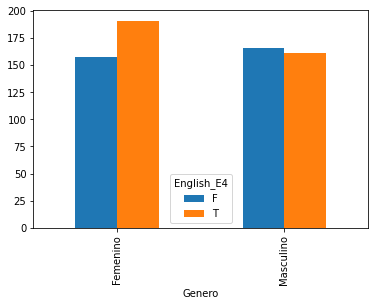

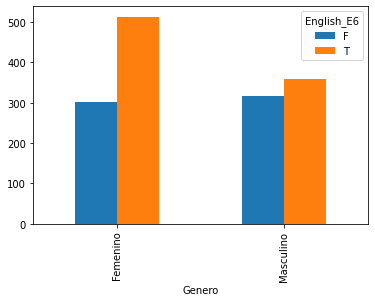

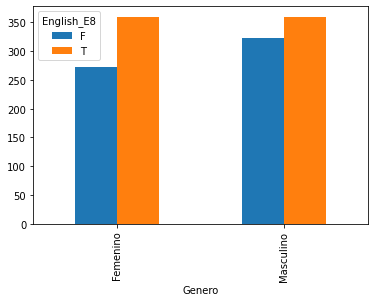

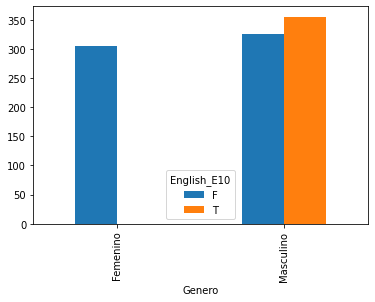

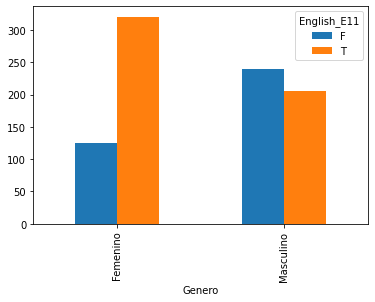

In [22]:
plt.figure()
data.groupby(['Genero','English_E1']).mean()['Longitud_E1'].unstack().plot(kind = 'bar')
data.groupby(['Genero','English_E4']).mean()['Longitud_E4'].unstack().plot(kind = 'bar')
data.groupby(['Genero','English_E6']).mean()['Longitud_E6'].unstack().plot(kind = 'bar')
data.groupby(['Genero','English_E8']).mean()['Longitud_E8'].unstack().plot(kind = 'bar')
data.groupby(['Genero','English_E10']).mean()['Longitud_E10'].unstack().plot(kind = 'bar')
data.groupby(['Genero','English_E11']).mean()['Longitud_E11'].unstack().plot(kind = 'bar')

### Boxplot del promedio de palabras por género

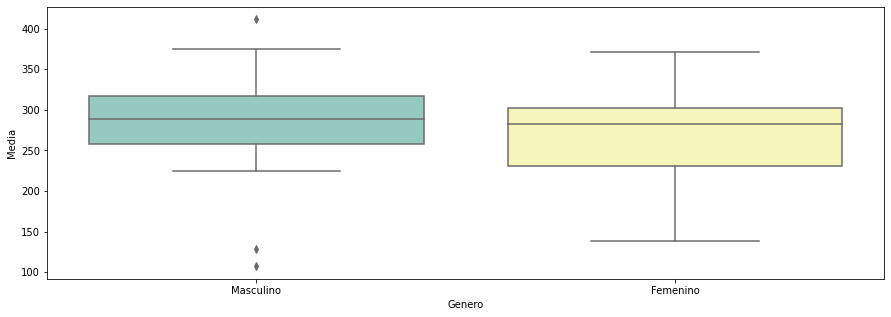

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Genero", y="Media",  data=data, palette="Set3")

Se evidencia que el promedio de palabras usadas por los hombres es superior al de las mujeres, aunque las mujeres tienden a usar menos palabras de la media.

### Boxplot del promedio de palabras por género del ejercicio E1

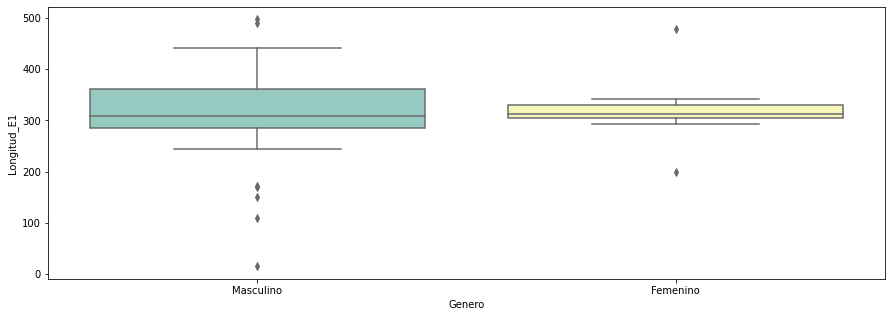

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Genero", y="Longitud_E1",  data=data, palette="Set3")

In [25]:
data.groupby(['Genero'])['Longitud_E1'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,10.0,319.800000,67.958811,199.0,199.0,241.3,283.6,296.5,303.75,312.0,330.00,354.7,416.35,478.0
Masculino,34.0,306.294118,99.384021,15.0,15.0,136.3,170.6,240.4,286.00,307.5,360.25,408.3,457.80,497.0


En el ejercicio E1 se evidencia que la mayoría de las mujeres usan en promedio la misma cantidad de palabras a excepción de dos outliers. Los hombres tienen una desviación más alta en esta tarea.

### Boxplot del promedio de palabras por idioma del ejercicio E1

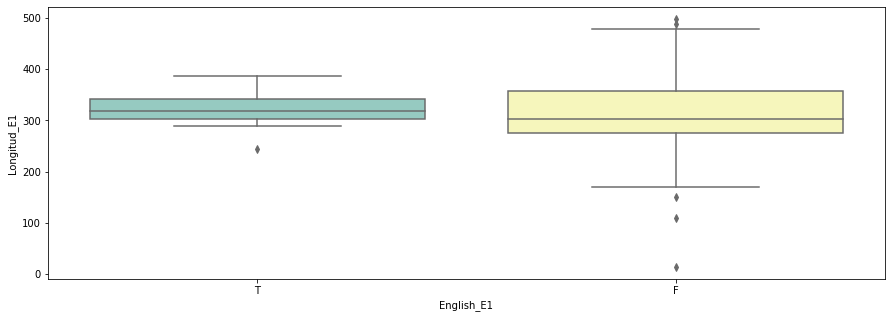

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E1", y="Longitud_E1",  data=data, palette="Set3")

In [27]:
data.groupby(['English_E1'])['Longitud_E1'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
English_E1,,,,,,,,,,,,,,
F,30.0,303.333333,109.755318,15.0,15.0,127.9,168.1,181.45,276.00,303.5,358.25,444.7,484.05,497.0
T,14.0,322.285714,35.249503,245.0,245.0,273.6,292.6,300.40,303.75,318.5,341.00,360.1,370.10,387.0


En promedio fueron usadas mas palabras para responder el ejercicio E1 en español que en inglés, aunque en español se aprecia una desviación más alta a unas más palabras que el promedio.

### Boxplot del promedio de palabras por idioma del ejercicio E4

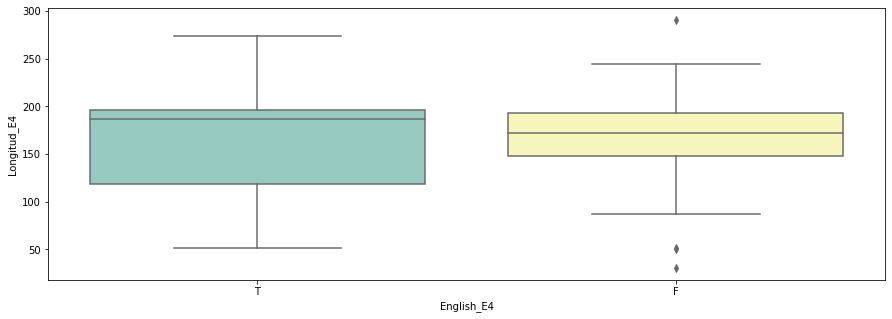

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E4", y="Longitud_E4",  data=data, palette="Set3")

In [29]:
data.groupby(['Genero'])['Longitud_E4'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,10.0,160.700000,38.128584,87.0,87.0,98.25,109.5,125.30,150.75,164.5,188.00,193.2,203.1,213.0
Masculino,34.0,164.794118,63.110187,31.0,31.0,50.65,60.1,87.55,134.50,173.5,196.75,233.6,254.5,290.0


Se usaron en promedio más palabras en inglés que en español, pero tuvo una alta viarianza. Los hombres emplearon más palabras en promedio que las mujeres.

### Boxplot del promedio de palabras por idioma del ejercicio E6

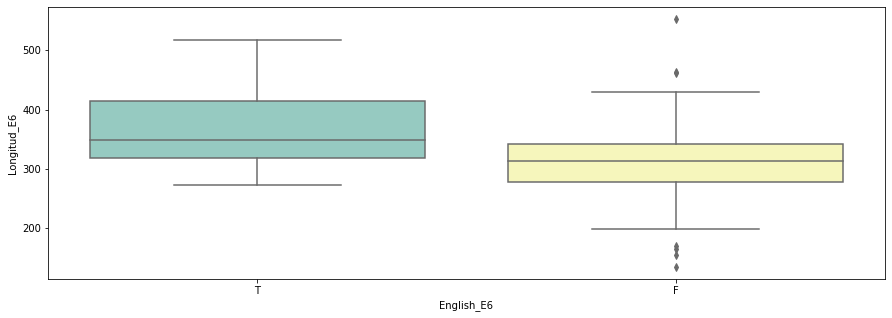

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E6", y="Longitud_E6",  data=data, palette="Set3")

In [31]:
data.groupby(['Genero'])['Longitud_E6'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,10.0,323.20000,110.861074,155.0,155.0,159.05,163.1,212.65,304.0,326.5,338.75,468.9,490.95,513.0
Masculino,32.0,326.46875,86.752144,135.0,135.0,184.95,260.5,266.30,283.0,318.0,357.00,427.8,486.20,552.0


En promedio fueron usadas mas palabras para responder el ejercicio E6 en inglés que en español, en inglés se aprecia una desviación más alta a unas más palabras que el promedio. El promedio de las palabras usadas por los hombres para esta tarea fue superior al de las mujeres.

### Boxplot del promedio de palabras por idioma del ejercicio E8

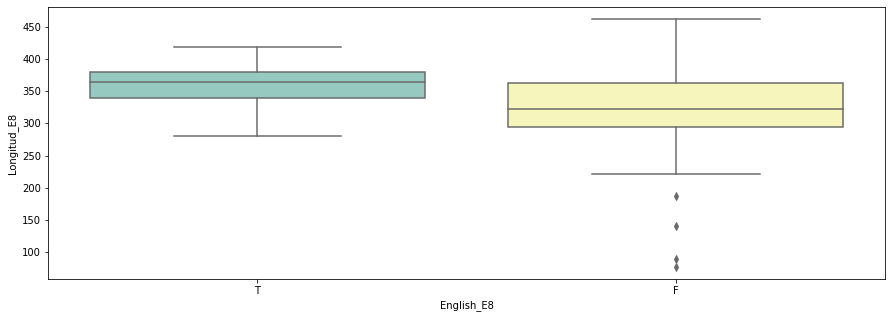

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E8", y="Longitud_E8",  data=data, palette="Set3")

In [33]:
data.groupby(['Genero'])['Longitud_E8'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,9.0,291.888889,112.232398,78.0,78.0,103.2,128.4,170.4,288.0,317.0,378.0,387.8,399.4,411.0
Masculino,29.0,332.620690,76.509296,89.0,89.0,201.0,246.0,286.2,310.0,344.0,373.0,419.6,423.8,461.0


Se usaron en promedio más palabras en inglés que en español y las respuestas de todos los estudiantes en inglés estuvieron muy cercanas al promedio de palabras. Tan sólo una mujer no frespondió la tarea y el pormedio de palabras usadas por ellas fue menor que el promedio de los hombres.

### Boxplot del promedio de palabras por idioma del ejercicio E10

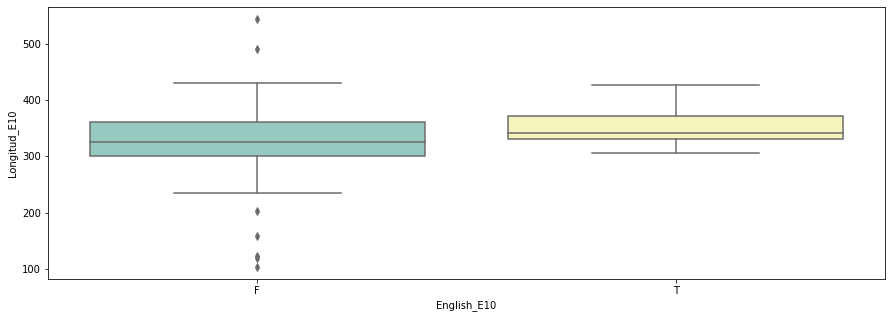

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E10", y="Longitud_E10",  data=data, palette="Set3")

In [35]:
data.groupby(['Genero'])['Longitud_E10'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,10.0,305.000000,89.055538,104.0,104.0,162.5,221.0,256.4,298.75,303.0,359.5,384.1,407.05,430.0
Masculino,35.0,329.828571,85.186469,119.0,119.0,148.2,227.2,297.5,308.00,334.0,364.0,415.4,445.90,543.0


En promedio fueron usadas mas palabras para responder el ejercicio E10 en inglés que en español, aunque las respuestas en español presentan mayor varianza. Todas las mujeres respondienron la tarea y usaron menos palabras en promedio que los hombres.

### Boxplot del promedio de palabras por idioma del ejercicio E11

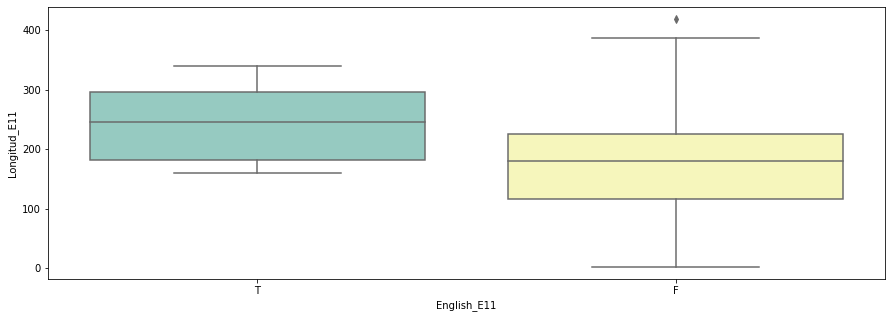

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x="English_E11", y="Longitud_E11",  data=data, palette="Set3")

In [37]:
data.groupby(['Genero'])['Longitud_E11'].describe(percentiles=[0.05, 0.1, 0.15, 0., .25, .5, .75, 0.9, 0.95])

,count,mean,std,min,0%,5%,10%,15%,25%,50%,75%,90%,95%,max
Genero,,,,,,,,,,,,,,
Femenino,6.0,190.333333,122.043708,3.0,3.0,36.25,69.5,102.75,140.00,181.0,279.00,320.5,329.75,339.0
Masculino,10.0,226.500000,109.478816,81.0,81.0,93.60,106.2,126.85,163.25,215.0,266.75,390.1,404.05,418.0


Se usaron en promedio más palabras en inglés que en español. Con una varianza similar en los dos idiomas. Los hombres usaron en promedio más palabras que las mujeres.

#### Promedio de palabras por tarea

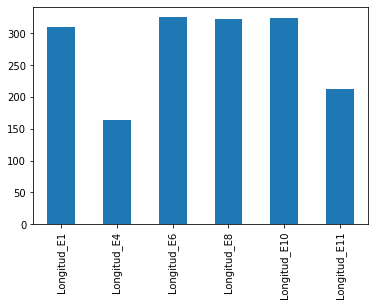

In [38]:
data[['Longitud_E1','Longitud_E4','Longitud_E6','Longitud_E8','Longitud_E10','Longitud_E11']].mean().plot(kind='bar')
plt.show()

Se evidencia que las tareas E1, E6, E8 y E10, presentan una longitud similar, mientras que la tarea E4 evidentemente es la tarea que menos palabras tiene.

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


### **Comparación a nivel de tarea**
Para ver la similitud a nivel tarea de todos los estudiantes.

**Tarea E1 - Examples of Time Series Analysis - Jaccard Similarity:**

In [39]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [40]:
#Poniendo valores iniciales
i=0
j=1
similarity= .45

df2 = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
df2.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Jaccard Similarity


In [41]:
Tarea1 =data.iloc[:,[1]].dropna()
lim_sup=Tarea1.shape[0]


for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        Rta_estudiante_1_1=Tarea1.iloc[i,0]
        Rta_estudiante_2_1=Tarea1.iloc[j,0]
        similarity=jaccard_similarity(Rta_estudiante_1_1, Rta_estudiante_2_1)
        df = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
        df2=df.append(df2)


In [42]:
df2.sort_values(by='Jaccard Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Jaccard Similarity
0,9,41,0.857143
0,4,43,0.853659
0,11,23,0.836066
0,1,6,0.835616
0,12,29,0.833333
...,...,...,...
0,8,24,0.362069
0,8,40,0.358209
0,6,8,0.352941
0,8,32,0.352941


De acuerdo con el **Jaccard Similarity** Los estudiantes que tienen mayor relación en sus tareas son el 9 con el 41, el estudiante 4 con el 43 y el estudiante 11 con el 23.

**Tarea E4 - Panel Data - Cosine Similarity:**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
import numpy as np

def cosine_distance_countVectorizer(s1, s2):

    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2]).todense()
    
    return 1-cosine(X_dtm[0], X_dtm[1])

In [44]:
#Poniendo valores iniciales
i=0
j=1
cos_sim = .73

df3 = pd.DataFrame([[i, j, cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
df3.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Cosine Similarity


In [45]:
Tarea4 =data.iloc[:,[2]].dropna()
lim_sup=Tarea4.shape[0]

for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        s1=Tarea4.iloc[i,0]
        s2=Tarea4.iloc[j,0]
        cos_sim = cosine_distance_countVectorizer(s1, s2)
        df = pd.DataFrame([[i, j ,cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
        df3=df.append(df3)

In [46]:
df3.sort_values(by='Cosine Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Cosine Similarity
0,5,15,0.892656
0,15,42,0.885834
0,15,30,0.877393
0,7,15,0.875738
0,15,24,0.872479
...,...,...,...
0,10,22,0.007493
0,25,39,0.006292
0,10,18,0.006290
0,33,39,0.004761


De acuerdo con el **Cosin Similarity** Los estudiantes que tienen mayor relación en la tarea E4 son el 5 con el 15, el estudiante 15 con el 42 y el estudiante 15 con el 30. El estudiante 15 se destaca por tener la mayor similitud con varios estudiantes.

**Tarea E6 - Decison Trees - Jaccard Similarity:**

In [47]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [48]:
#Poniendo valores iniciales
i=0
j=1
similarity= .45

df2 = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
df2.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Jaccard Similarity


In [49]:
Tarea6 =data.iloc[:,[3]].dropna()
lim_sup=Tarea6.shape[0]


for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        Rta_estudiante_1_3=Tarea6.iloc[i,0]
        Rta_estudiante_2_3=Tarea6.iloc[j,0]
        similarity=jaccard_similarity(Rta_estudiante_1_3, Rta_estudiante_2_3)
        df = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
        df2=df.append(df2)


In [50]:
df2.sort_values(by='Jaccard Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Jaccard Similarity
0,17,33,0.881356
0,12,30,0.867925
0,20,38,0.865385
0,2,10,0.852459
0,11,14,0.847458
...,...,...,...
0,4,26,0.434211
0,4,37,0.419753
0,27,34,0.414286
0,4,27,0.407895


De acuerdo con el **Jaccard Similarity** Los estudiantes que tienen mayor relación en la tarea E6 son el 17 con el 33, el estudiante 12 con el 30 y el estudiante 20 con el 38.

**Tarea E8 - Ensemble Trees Overview - Jaccard Similarity:**

In [51]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [52]:
#Poniendo valores iniciales
i=0
j=1
similarity= .45

df2 = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
df2.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Jaccard Similarity


In [53]:
Tarea8 =data.iloc[:,[4]].dropna()
lim_sup=Tarea8.shape[0]


for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        Rta_estudiante_1_8=Tarea8.iloc[i,0]
        Rta_estudiante_2_8=Tarea8.iloc[j,0]
        similarity=jaccard_similarity(Rta_estudiante_1_8, Rta_estudiante_2_8)
        df = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
        df2=df.append(df2)


In [54]:
df2.sort_values(by='Jaccard Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Jaccard Similarity
0,19,25,0.909091
0,18,35,0.906977
0,27,29,0.836735
0,8,26,0.830189
0,27,35,0.829787
...,...,...,...
0,10,33,0.378378
0,1,10,0.378378
0,4,21,0.364865
0,10,17,0.361111


De acuerdo con el **Jaccard Similarity** Los estudiantes que tienen mayor relación en la tarea E8 son el 19 con el 25, el estudiante 18 con el 35 y el estudiante 27 con el 29.

**Tarea E10 - REST-API - Cosine Similarity:**

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
import numpy as np

def cosine_distance_countVectorizer(s1, s2):

    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2]).todense()
    
    return 1-cosine(X_dtm[0], X_dtm[1])

In [56]:
#Poniendo valores iniciales
i=0
j=1
cos_sim = .73

df3 = pd.DataFrame([[i, j, cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
df3.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Cosine Similarity


In [57]:
Tarea10 =data.iloc[:,[5]].dropna()
lim_sup=Tarea10.shape[0]

for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        s1=Tarea10.iloc[i,0]
        s2=Tarea10.iloc[j,0]
        cos_sim = cosine_distance_countVectorizer(s1, s2)
        df = pd.DataFrame([[i, j ,cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
        df3=df.append(df3)

In [58]:
df3.sort_values(by='Cosine Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Cosine Similarity
0,24,37,0.909595
0,2,22,0.907017
0,22,39,0.892993
0,2,10,0.885601
0,10,22,0.880637
...,...,...,...
0,4,13,0.000000
0,4,15,0.000000
0,4,16,0.000000
0,3,13,0.000000


De acuerdo con el **Cosine Similarity** Los estudiantes que tienen mayor relación en la tarea E10 son el 24 con el 37, el estudiante 2 con el 22 y el estudiante 22 con el 39.

**Tarea E11 - Natural Language Processing Overview - Cosine Similarity:**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
import numpy as np

def cosine_distance_countVectorizer(s1, s2):

    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2]).todense()
    
    return 1-cosine(X_dtm[0], X_dtm[1])

In [60]:
#Poniendo valores iniciales
i=0
j=1
cos_sim = .73

df3 = pd.DataFrame([[i, j, cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
df3.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Cosine Similarity


In [61]:
Tarea11 =data.iloc[:,[6]].dropna()
lim_sup=Tarea11.shape[0]

for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        s1=Tarea11.iloc[i,0]
        s2=Tarea11.iloc[j,0]
        cos_sim = cosine_distance_countVectorizer(s1, s2)
        df = pd.DataFrame([[i, j ,cos_sim]], columns=('Estudiante-i','Estudiante-j','Cosine Similarity'))
        df3=df.append(df3)

In [62]:
df3.sort_values(by='Cosine Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Cosine Similarity
0,3,4,0.837409
0,4,9,0.799761
0,3,9,0.774903
0,3,13,0.767021
0,2,4,0.749017
...,...,...,...
0,1,8,0.000000
0,8,15,0.000000
0,4,8,0.000000
0,8,9,0.000000


De acuerdo con el **Cosine Similarity** los estudiantes que tienen mayor relación en la tarea E11 son el 3 con el 4, el estudiante 4 con el 9 y el estudiante 3 con el 9.

### **Comparación nivel de estudiante**
Para ver la similitud que tienen los estudiantes a nivel del curso ( incluyendo todas las tareas).

In [63]:
#Los datos nulos se reemplazan por espacio.
data0 = data
data0['E1 - Examples of Time Series Analysis'] = data['E1 - Examples of Time Series Analysis'].fillna(' ')
data0['E4 - Panel Data'] = data['E4 - Panel Data'].fillna(' ')
data0['E6 - Decison Trees'] = data['E6 - Decison Trees'].fillna(' ')
data0['E8 - Ensemble Trees Overview'] = data['E8 - Ensemble Trees Overview'].fillna(' ')
data0['E10 - REST-API'] = data['E10 - REST-API'].fillna(' ')
data0['E11 - Natural Language Processing Overview'] = data['E11 - Natural Language Processing Overview'].fillna(' ')

In [64]:
#Se crea una nueva columna la cual incluye la respuesta a todas las tareas por alumno.
data0["AllHomeworks"]=data0["E1 - Examples of Time Series Analysis"]+" "+ data0["E4 - Panel Data"]+" "+ data0["E6 - Decison Trees"]+" "+ data0["E8 - Ensemble Trees Overview"]+" "+ data0["E10 - REST-API"]+" "+ data0["E11 - Natural Language Processing Overview"] 	
data0.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media,Tareas Faltantes,English_E1,English_E4,English_E6,English_E8,English_E10,English_E11,p_english,usa_english,AllHomeworks
0,Masculino,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,,301.0,51.0,319.0,309.0,302.0,NaN,256.400000,1.0,T,T,T,T,F,NaN,0.666667,1,One of the most valuable application of time s...
1,Femenino,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,,478.0,190.0,341.0,382.0,305.0,NaN,339.200000,1.0,F,F,F,T,F,NaN,0.166667,1,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...
2,Masculino,Una serie de tiempo es una colección de datos ...,,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000,1.0,F,NaN,T,T,F,T,0.500000,1,Una serie de tiempo es una colección de datos ...
3,Masculino,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,,333.0,119.0,273.0,372.0,331.0,NaN,285.600000,1.0,T,T,T,T,T,NaN,0.833333,1,\nGiven that Time Series Analysis allows to un...
4,Masculino,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667,0.0,T,T,T,T,T,T,1.000000,1,Time Series Analysis is concerned with the stu...


**Jaccard Similarity:**

In [65]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [66]:
#Poniendo valores iniciales
i=0
j=1
similarity= .45

df2 = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
df2.drop([0],axis=0)

,Estudiante-i,Estudiante-j,Jaccard Similarity


In [67]:
AllHom = data.iloc[:,[23]].dropna()
lim_sup = AllHom.shape[0]


for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        Rta_estudiante_1=AllHom.iloc[i,0]
        Rta_estudiante_2=AllHom.iloc[j,0]
        similarity=jaccard_similarity(Rta_estudiante_1, Rta_estudiante_2)
        df = pd.DataFrame([[i, j,similarity]], columns=('Estudiante-i','Estudiante-j','Jaccard Similarity'))
        df2=df.append(df2)


In [68]:
df2.sort_values(by='Jaccard Similarity', ascending=False)

,Estudiante-i,Estudiante-j,Jaccard Similarity
0,22,32,0.903226
0,21,43,0.900000
0,16,44,0.898734
0,22,26,0.890625
0,19,40,0.888889
...,...,...,...
0,13,30,0.466667
0,13,41,0.461538
0,0,1,0.450000
0,13,27,0.439024


Al comparar la relación de todas las tareas se evidencia que el estudiante 22 y 32 guarda la mayor similitud en todas las tareas, seguidos del estudiante 21 con el estudiante 43.

# Exercise 13.3
Create a classifier to predict the gender of each student

In [69]:
data['y']=np.where((data["Genero"])=="Femenino", 1, 0)
data["y"].describe()

count    46.000000
mean      0.217391
std       0.417029
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: y, dtype: float64

Se identifican las tareas con menores faltantes, con el fin de utilizar las que más tengan información.

In [70]:
data.isnull().sum()

Genero                                         0
E1 - Examples of Time Series Analysis          0
E4 - Panel Data                                0
E6 - Decison Trees                             0
E8 - Ensemble Trees Overview                   0
E10 - REST-API                                 0
E11 - Natural Language Processing Overview     0
Longitud_E1                                    2
Longitud_E4                                    2
Longitud_E6                                    4
Longitud_E8                                    8
Longitud_E10                                   1
Longitud_E11                                  30
Media                                          0
Tareas Faltantes                               0
English_E1                                     2
English_E4                                     2
English_E6                                     4
English_E8                                     8
English_E10                                    1
English_E11         

Se escogen las tareas E1, E4 y E10 para hacer la predicción.

### Predicción del género usando CountVectorizer y RandomForest()

In [71]:
data2=data.loc[:,["Genero",'E1 - Examples of Time Series Analysis']].dropna()
data2.shape

(46, 2)

In [72]:
X = data2['E1 - Examples of Time Series Analysis']
y = data2['Genero'].map({'Masculino':0,'Femenino':1})

In [73]:
X.shape

(46,)

In [74]:
X.head()

0    One of the most valuable application of time s...
1    ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...
2    Una serie de tiempo es una colección de datos ...
3    \nGiven that Time Series Analysis allows to un...
4    Time Series Analysis is concerned with the stu...
Name: E1 - Examples of Time Series Analysis, dtype: object

In [75]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Genero, dtype: int64

In [76]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [77]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    clf = RandomForestClassifier()
    print(pd.Series(cross_val_score(clf, X_dtm, y, cv=5)).describe())

In [78]:
import time
tic = time.clock()
vect = CountVectorizer(lowercase=True,ngram_range=(1, 2), min_df=2)
tokenize_test(vect)
toc = time.clock()

Features:  2190
count    5.000000
mean     0.782222
std      0.009938
min      0.777778
25%      0.777778
50%      0.777778
75%      0.777778
max      0.800000
dtype: float64


In [79]:
(toc-tic)/60

0.013212250000000007

Usando los datos de la tarea E1, por medio de un Random Forest se obtiene un accuracy de 0.77. El proceso se tarda 0.013 minutos en ejecutar.

#### Usando el ejercicio: E4 - Panel Data

In [80]:
data2=data.loc[:,["Genero",'E4 - Panel Data']].dropna()
X = data2['E4 - Panel Data']
y = data2['Genero'].map({'Masculino':0,'Femenino':1})

In [81]:
import time
tic = time.clock()
vect = CountVectorizer(lowercase=True,ngram_range=(1, 2), min_df=2)
tokenize_test(vect)
toc = time.clock()

Features:  1166
count    5.000000
mean     0.782222
std      0.009938
min      0.777778
25%      0.777778
50%      0.777778
75%      0.777778
max      0.800000
dtype: float64


In [82]:
(toc-tic)/60

0.012481466666666623

Usando los datos de la tarea E4, por medio de un Random Forest se obtiene un accuracy de 0.77. El proceso se tarda 0.0124 minutos en ejecutar. Este se demora menos tiempo, pero arroja un accuracy similar al de la tarea E1 usando la misma técnica.

#### Usando el ejercicio: E10 - REST-API

In [83]:
data2=data.loc[:,["Genero",'E10 - REST-API']].dropna()
data2.shape

(46, 2)

In [84]:
X = data2['E10 - REST-API']
y = data2['Genero'].map({'Masculino':0,'Femenino':1})

In [85]:
import time
tic = time.clock()
vect = CountVectorizer(lowercase=True,ngram_range=(1, 2), min_df=2)
tokenize_test(vect)
toc = time.clock()

Features:  2828
count    5.000000
mean     0.760000
std      0.053055
min      0.666667
25%      0.777778
50%      0.777778
75%      0.777778
max      0.800000
dtype: float64


In [86]:
(toc-tic)/60

0.01275454999999995

La predicción usando la tarea E10 disminuye el accuracy respecto a las otras dos tareas (E1 y E4) y tarda 0.013 minutos en ejecutarse

**Conclusión:** Por tareas individuales las que mejor predicen el género son las tareas E1 y E4 con un accuracy de 0.77. Aunque la predicción con tarea E4 tarda menos en ejecutarse.

### Predicción del género usando CountVectorizer y RandomForest() con 4 tareas

Se seleccionana las taresas E1, E4, E6 y E10, dado que son las que tienen mayor porcentaje de respuesta por parte de los estudiantes.

In [87]:
data['Ejercicios'] = data['E1 - Examples of Time Series Analysis'] + data['E4 - Panel Data']+data['E6 - Decison Trees']+data['E10 - REST-API']
print(data.dtypes)

Genero                                         object
E1 - Examples of Time Series Analysis          object
E4 - Panel Data                                object
E6 - Decison Trees                             object
E8 - Ensemble Trees Overview                   object
E10 - REST-API                                 object
E11 - Natural Language Processing Overview     object
Longitud_E1                                   float64
Longitud_E4                                   float64
Longitud_E6                                   float64
Longitud_E8                                   float64
Longitud_E10                                  float64
Longitud_E11                                  float64
Media                                         float64
Tareas Faltantes                              float64
English_E1                                     object
English_E4                                     object
English_E6                                     object
English_E8                  

In [88]:
data.isnull().sum()

Genero                                         0
E1 - Examples of Time Series Analysis          0
E4 - Panel Data                                0
E6 - Decison Trees                             0
E8 - Ensemble Trees Overview                   0
E10 - REST-API                                 0
E11 - Natural Language Processing Overview     0
Longitud_E1                                    2
Longitud_E4                                    2
Longitud_E6                                    4
Longitud_E8                                    8
Longitud_E10                                   1
Longitud_E11                                  30
Media                                          0
Tareas Faltantes                               0
English_E1                                     2
English_E4                                     2
English_E6                                     4
English_E8                                     8
English_E10                                    1
English_E11         

In [89]:
data2=data.loc[:,["Genero",'Ejercicios']].dropna()
data2.shape

(46, 2)

In [90]:
X = data2['Ejercicios']
y = data2['Genero'].map({'Masculino':0,'Femenino':1})

In [91]:
import time
tic = time.clock()
vect = CountVectorizer(lowercase=True,ngram_range=(1, 2), min_df=2)
tokenize_test(vect)
toc = time.clock()

Features:  7790
count    5.000000
mean     0.782222
std      0.009938
min      0.777778
25%      0.777778
50%      0.777778
75%      0.777778
max      0.800000
dtype: float64


**Conclusión:** Usando las cuatro tareas, se genera un accuracy de 0.72 de predicción del género.

### Predice usando Random Forest a partir de la creación de nuevas variables

Se incluyen las variables que describen las tareas, como idioma, longitud, promedio total de palabras en las tareas, número de tareas faltantes.

In [92]:
print(data.dtypes)

Genero                                         object
E1 - Examples of Time Series Analysis          object
E4 - Panel Data                                object
E6 - Decison Trees                             object
E8 - Ensemble Trees Overview                   object
E10 - REST-API                                 object
E11 - Natural Language Processing Overview     object
Longitud_E1                                   float64
Longitud_E4                                   float64
Longitud_E6                                   float64
Longitud_E8                                   float64
Longitud_E10                                  float64
Longitud_E11                                  float64
Media                                         float64
Tareas Faltantes                              float64
English_E1                                     object
English_E4                                     object
English_E6                                     object
English_E8                  

In [93]:
#Identifica si la respuesta a cada tarea está en idioma inglés 
data['English_E1'] = np.where(data['E1 - Examples of Time Series Analysis'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E1"] != data["Longitud_E1"], "English_E1"] = np.nan 
data['English_E4'] = np.where(data['E4 - Panel Data'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E4"] != data["Longitud_E4"], "English_E4"] = np.nan 
data['English_E6'] = np.where(data['E6 - Decison Trees'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E6"] != data["Longitud_E6"], "English_E6"] = np.nan
data['English_E8'] = np.where(data['E8 - Ensemble Trees Overview'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E8"] != data["Longitud_E8"], "English_E8"] = np.nan
data['English_E10'] = np.where(data['E10 - REST-API'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E10"] != data["Longitud_E10"], "English_E10"] = np.nan
data['English_E11'] = np.where(data['E11 - Natural Language Processing Overview'].str.contains("the", case=False, na=False), 1, 0)
data.loc[data["Longitud_E11"] != data["Longitud_E11"], "English_E11"] = np.nan
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,Longitud_E1,Longitud_E4,Longitud_E6,Longitud_E8,Longitud_E10,Longitud_E11,Media,Tareas Faltantes,English_E1,English_E4,English_E6,English_E8,English_E10,English_E11,p_english,usa_english,AllHomeworks,y,Ejercicios
0,Masculino,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,,301.0,51.0,319.0,309.0,302.0,NaN,256.400000,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.666667,1,One of the most valuable application of time s...,0,One of the most valuable application of time s...
1,Femenino,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,,478.0,190.0,341.0,382.0,305.0,NaN,339.200000,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.166667,1,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,1,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...
2,Masculino,Una serie de tiempo es una colección de datos ...,,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",244.0,NaN,319.0,351.0,334.0,160.0,281.600000,1.0,0.0,NaN,1.0,1.0,0.0,1.0,0.500000,1,Una serie de tiempo es una colección de datos ...,0,Una serie de tiempo es una colección de datos ...
3,Masculino,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,,333.0,119.0,273.0,372.0,331.0,NaN,285.600000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.833333,1,\nGiven that Time Series Analysis allows to un...,0,\nGiven that Time Series Analysis allows to un...
4,Masculino,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,228.0,517.0,417.0,341.0,210.0,345.666667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1,Time Series Analysis is concerned with the stu...,0,Time Series Analysis is concerned with the stu...


Se seleccionan las variables a usar en el modelo:

In [94]:
data3=data.loc[:,["y",'Longitud_E1','Longitud_E4','Longitud_E6','Longitud_E8','Longitud_E10','Longitud_E11'
                 ,'Media','Tareas Faltantes','English_E1','English_E4','English_E6','English_E8','English_E10','English_E11'
                 ,'p_english','usa_english']]
data3.shape

(46, 17)

In [95]:
print(data3.dtypes)

y                     int64
Longitud_E1         float64
Longitud_E4         float64
Longitud_E6         float64
Longitud_E8         float64
Longitud_E10        float64
Longitud_E11        float64
Media               float64
Tareas Faltantes    float64
English_E1          float64
English_E4          float64
English_E6          float64
English_E8          float64
English_E10         float64
English_E11         float64
p_english           float64
usa_english           int64
dtype: object


In [96]:
data3['Longitud_E1'] = data3['Longitud_E1'].fillna(0)
data3['Longitud_E4'] = data3['Longitud_E4'].fillna(0)
data3['Longitud_E6'] = data3['Longitud_E6'].fillna(0)
data3['Longitud_E8'] = data3['Longitud_E8'].fillna(0)
data3['Longitud_E10'] = data3['Longitud_E10'].fillna(0)
data3['Longitud_E11'] = data3['Longitud_E11'].fillna(0)
data3['English_E1'] = data3['English_E1'].fillna(0)
data3['English_E4'] = data3['English_E4'].fillna(0)
data3['English_E6'] = data3['English_E6'].fillna(0)
data3['English_E8'] = data3['English_E8'].fillna(0)
data3['English_E10'] = data3['English_E10'].fillna(0)
data3['English_E11'] = data3['English_E11'].fillna(0)

In [97]:
data3.isnull().sum()

y                   0
Longitud_E1         0
Longitud_E4         0
Longitud_E6         0
Longitud_E8         0
Longitud_E10        0
Longitud_E11        0
Media               0
Tareas Faltantes    0
English_E1          0
English_E4          0
English_E6          0
English_E8          0
English_E10         0
English_E11         0
p_english           0
usa_english         0
dtype: int64

In [98]:
y = data3['y']
X = data3.drop(['y'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [100]:
X_test.shape

(7, 16)

In [101]:
clf = RandomForestClassifier(n_estimators=200, max_features=16, random_state=1, n_jobs=-1)
cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()

0.7150000000000001

El accuracy resultante fue de 0.715 para predecir el género.

### Predice usando XGBoosting a partir de la creación de nuevas variables

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, max_features=16, random_state=1)
clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=16, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [103]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.0, 0.5714285714285714)

Al implementar un modelo XGBoost encontramos un accuracy de 0.5714. Generando el accuracy más bajo dentro de las metodologías usadas anteriormente.

# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [104]:
#from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
data3[np.isnan(data3)] = 0

In [105]:
cluster = AgglomerativeClustering(n_clusters=3)
sol = cluster.fit_predict(data3.values)
sol

array([2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2,
       2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0,
       2, 2])

In [106]:
print(data3.dtypes)

y                     int64
Longitud_E1         float64
Longitud_E4         float64
Longitud_E6         float64
Longitud_E8         float64
Longitud_E10        float64
Longitud_E11        float64
Media               float64
Tareas Faltantes    float64
English_E1          float64
English_E4          float64
English_E6          float64
English_E8          float64
English_E10         float64
English_E11         float64
p_english           float64
usa_english           int64
dtype: object


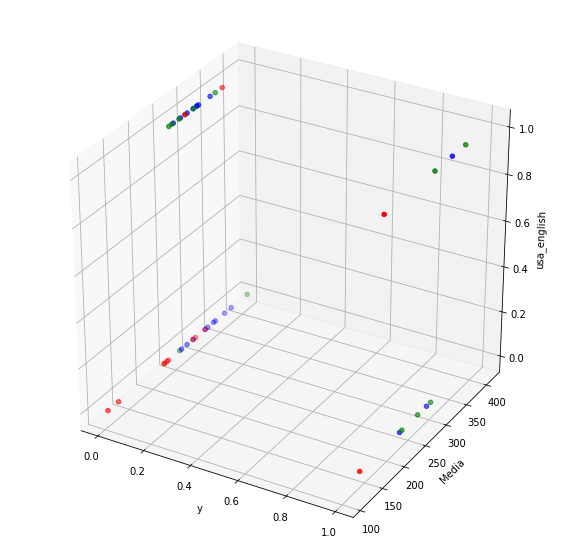

In [107]:
col = ['r','g','b','c']
cols = [col[s] for s in sol]

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data3.iloc[:,0], data3.iloc[:,-10], data3.iloc[:,-1], c=cols)
ax.set_xlabel(data3.columns[0])
ax.set_ylabel(data3.columns[-10])
ax.set_zlabel(data3.columns[-1])
plt.show()

De acuerdo con esta segmentación, en general se puede ver que los estudiantes de la materia se pueden clasificar en al menos cuatro grupos así:


1.   No_Bilingue_básico : Quienes no usan inglés en sus tareas y su promedio de palabras es menor al promedio total del curso.
2.   No_Bilingue_milla_extra: Quienes no usan inglés y su promedio de número de palabras está por encima del promedio de número de palabras general.
3.   Bilingue_milla_extra: Los estudiantes que usan inglés en sus tareas con un promedio de palabras superior al del total del curso.
4.   Bilingue_básico: Los estudiantes que usan inglés en sus tareas con un promedio de palabras inferior al del total del curso.




In [108]:
def grupos_df(data):
    if (data['usa_english'] == 0 and data['Media']<=281.733333 ):
        return 'No_Bilingue_básico'
    elif (data['usa_english'] == 0 and data['Media']>281.733333 ):
        return 'No_Bilingue_milla_extra'
    elif (data['usa_english'] == 1 and data['Media']>281.733333 ):
        return 'Bilingue_milla_extra'
    elif (data['usa_english'] == 1 and data['Media']<=281.733333 ):
        return 'Bilingue_básico'

In [109]:
data['grupos'] = data.apply(grupos_df, axis = 1)

In [110]:
data['grupos'].value_counts()

No_Bilingue_milla_extra    13
No_Bilingue_básico         13
Bilingue_milla_extra       12
Bilingue_básico             8
Name: grupos, dtype: int64

In [116]:
data.groupby(['grupos'])['p_english'].describe()
data.groupby(['grupos','Genero'])['Media'].describe()

count        mean  ...         75%         max
grupos                  Genero                        ...                        
Bilingue_básico         Femenino     1.0  184.500000  ...  184.500000  184.500000
                        Masculino    7.0  265.457143  ...  275.850000  281.600000
Bilingue_milla_extra    Femenino     3.0  336.233333  ...  355.016667  370.833333
                        Masculino    9.0  316.159259  ...  334.600000  361.000000
No_Bilingue_básico      Femenino     4.0  218.950000  ...  244.458333  272.333333
                        Masculino    9.0  216.618519  ...  259.166667  275.200000
No_Bilingue_milla_extra Femenino     2.0  298.466667  ...  300.900000  303.333333
                        Masculino   11.0  330.963636  ...  348.950000  411.500000

[8 rows x 8 columns]

Los estudiantes que más usaron palabras, se ubican en el grupo No_Bilingue_milla_extra y pertenecen al género masculino.

Los hombres se ubican en su mayoría en el grupo No_Bilingue_milla_extra.

La agrupación que más usa palabras en promedio es el femenino ubicado en el grupo Bilingue_milla_extra.

La clasificación donde el minimo de palabras fue el menos de todos los grupos es el No_Bilingue_básico Masculino.

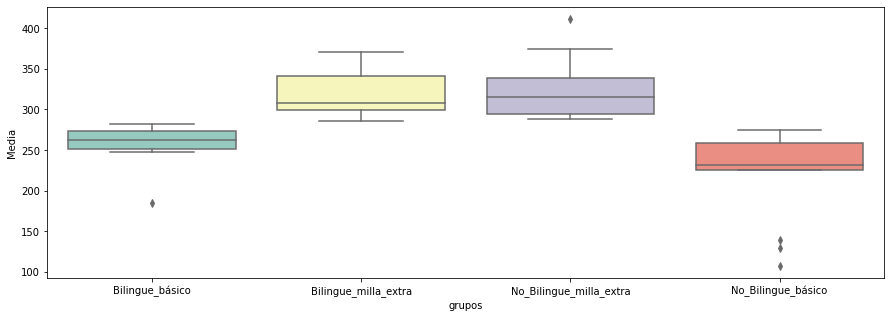

In [112]:
plt.figure(figsize=(15,5))
sns.boxplot(x="grupos", y="Media",  data=data, palette="Set3")

El grupo con mayor promedio de palabras es No_Bilingue_milla_extra con unos outliers cercanos a 400.

El grupo que presenta menor cantidad de palabras en promedio es el No_Bilingue_básico. Con un sesgo hacia una media mayor.

El grupo Bilingue Básico es el que tiene menor desviación y presenta un outlier cercano a 200.

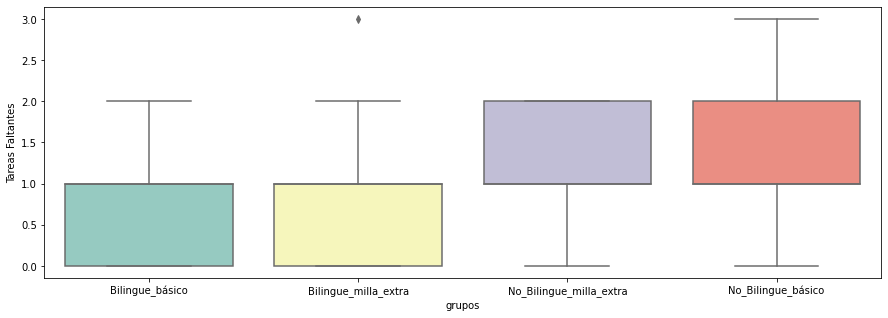

In [113]:
plt.figure(figsize=(15,5))
sns.boxplot(x="grupos", y="Tareas Faltantes",  data=data, palette="Set3")

Las tareas faltantes de los grupos Bilingue_básico y Bilingue_milla_extra se comportan de manera similar, estos se ubican entre 0 y 1 con algunos outliers hacia 2 y 3.

Las tareas faltantes de los grupos No bilingues se ubican entre 1 y 2. En el caso de No_Bilingue_extra tiene outliers hacia 0 y en el caso de No_Bilingue_básico outliers hacia 0 y hacia 3.

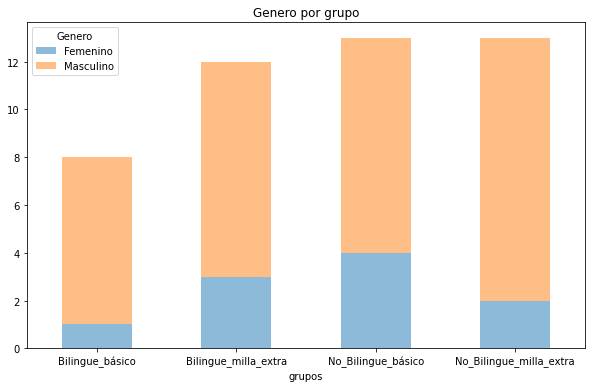

In [114]:
pd.crosstab(index = data["grupos"],columns = data["Genero"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Genero por grupo")

Se evidencia que hay más estudiantes en los grupos No bilingues que en los otros. Las mujeres se concentran en los grupos No_Bilingue_básico y Bilingue_milla_extra.